In [1]:
import torch
#import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# Gradients

In [2]:
x = torch.tensor(2.0, requires_grad = True)
x

tensor(2., requires_grad=True)

In [3]:
y = 2*x**4+x**3+3*x**2+5*x+1
y

tensor(63., grad_fn=<AddBackward0>)

In [4]:
type(y)

torch.Tensor

In [5]:
y.backward()

# 意思是在 x = 2, y = 63 这个点上的 gradient 是 93
x.grad

tensor(93.)

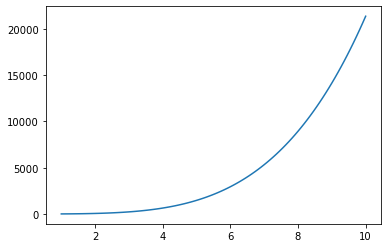

In [6]:
# plotting the polynomial function

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1,10,num = 100)
y = []
for i in x:
    y.append(2*i**4+i**3+3*i**2+5*i+1)



plt.plot(x, y)
plt.show()

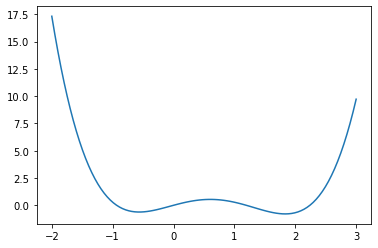

In [7]:
#https://www.intmath.com/equations-of-higher-degree/1-polynomial-functions.php
x = np.linspace(-2,3,num = 100)
y = []
for i in x:
    y.append(0.6*i**4-1.5*i**3-0.32*i**2+1.5*i+0)



plt.plot(x, y)
plt.show()

In [8]:
x = torch.tensor(-1.5, requires_grad = True)
y = 0.6*x**4-1.5*x**3-0.32*x**2+1.5*x+0
x,y

(tensor(-1.5000, requires_grad=True), tensor(5.1300, grad_fn=<AddBackward0>))

In [9]:
y.backward()
x.grad

tensor(-15.7650)

In [10]:
# 可以看出图上当X = -0.6 这个时候 x grad 最低
x = torch.tensor(-0.6, requires_grad = True)
y = 0.6*x**4-1.5*x**3-0.32*x**2+1.5*x+0

y.backward()
x.grad

tensor(-0.2544)

# Linear Regression 

In [44]:
x = torch.linspace(1,50,50).reshape(-1,1)
e = torch.randint(-8,9,(50,1), dtype= torch.float)

In [12]:
# e stands for errors 
y = 2*x+1 + e

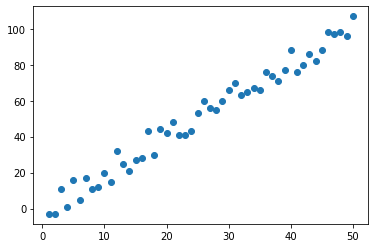

In [13]:
plt.scatter(x.numpy(), y.numpy())

In [14]:
# random model weights and bias 
model = nn.Linear(in_features=1, out_features=1)
model.weight, model.bias

(Parameter containing:
 tensor([[-0.1960]], requires_grad=True),
 Parameter containing:
 tensor([-0.5639], requires_grad=True))

In [15]:
# 上面是一个simple linear model 我们只需要一个 simple linear layer。 需要set up model class. 只有一个feature， output也是一个


class LinearModel(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred


In [16]:
lm = LinearModel(1,1)
lm

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [17]:
lm.linear.weight, lm.linear.bias

(Parameter containing:
 tensor([[0.7745]], requires_grad=True),
 Parameter containing:
 tensor([-0.0990], requires_grad=True))

In [18]:
for name, para in lm.named_parameters():
    print(name, para.item())

linear.weight 0.77447509765625
linear.bias -0.09896993637084961


In [19]:
# 2.0*lm.linear.weight + lm.linear.bias
x = torch.tensor([2.0])
lm.forward(x)

tensor([1.4500], grad_fn=<AddBackward0>)

In [20]:
2.0*lm.linear.weight + lm.linear.bias

tensor([[1.4500]], grad_fn=<AddBackward0>)

In [45]:
#x1 = np.linspace(0,50,50)
x1 = torch.linspace(1,50,50).reshape(-1,1)
x1

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [46]:
type(x1),x1.shape

(torch.Tensor, torch.Size([50, 1]))

In [48]:
pred1 = lm.forward(x1)
pred1

tensor([[ 0.6755],
        [ 1.4500],
        [ 2.2245],
        [ 2.9989],
        [ 3.7734],
        [ 4.5479],
        [ 5.3224],
        [ 6.0968],
        [ 6.8713],
        [ 7.6458],
        [ 8.4203],
        [ 9.1947],
        [ 9.9692],
        [10.7437],
        [11.5182],
        [12.2926],
        [13.0671],
        [13.8416],
        [14.6161],
        [15.3905],
        [16.1650],
        [16.9395],
        [17.7140],
        [18.4884],
        [19.2629],
        [20.0374],
        [20.8119],
        [21.5863],
        [22.3608],
        [23.1353],
        [23.9098],
        [24.6842],
        [25.4587],
        [26.2332],
        [27.0077],
        [27.7821],
        [28.5566],
        [29.3311],
        [30.1056],
        [30.8800],
        [31.6545],
        [32.4290],
        [33.2035],
        [33.9779],
        [34.7524],
        [35.5269],
        [36.3014],
        [37.0758],
        [37.8503],
        [38.6248]], grad_fn=<AddmmBackward0>)

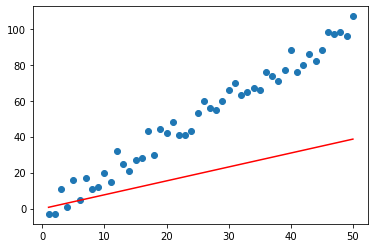

In [56]:
# 红色的是还没有学习的 就是model初次生成的weights & bias。 蓝色的是real points
# 没有loss function， optimization 啥的没的时候
plt.scatter(x.numpy(), y.numpy())
plt.plot(x1.detach().numpy(), pred1.detach().numpy(), 'r')

In [63]:
for name in lm.parameters():
    print(name)

Parameter containing:
tensor([[0.7745]], requires_grad=True)
Parameter containing:
tensor([-0.0990], requires_grad=True)


In [64]:
lossfunction = nn.MSELoss()
optimizer = torch.optim.SGD(params= lm.parameters(), lr= 0.001)
epochs = 50
losses = []

for i in range(epochs):
    i+= 1
    
    y_pred = lm.forward(x)
    
    loss = lossfunction(y_pred,y)
    losses.append(loss)
    
    print(f'epoch {i} loss: {loss.item()} weight: {lm.linear.weight.item()} bias: {lm.linear.bias.item()}')
    
    optimizer.zero_grad()